In [1]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Softmax
from keras.initializers import GlorotNormal, GlorotUniform

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Fetal Health Classifier

Dataset: https://www.kaggle.com/andrewmvd/fetal-health-classification

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318



### Import Data


In [3]:
df = pd.read_csv('data/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

No hay datos faltantes.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Todas las variables son numericas o categoricas con una representacion numerica, por lo que no es necesario aplicar codificacion de variables categoricas.

#### Visualizacion de datos.

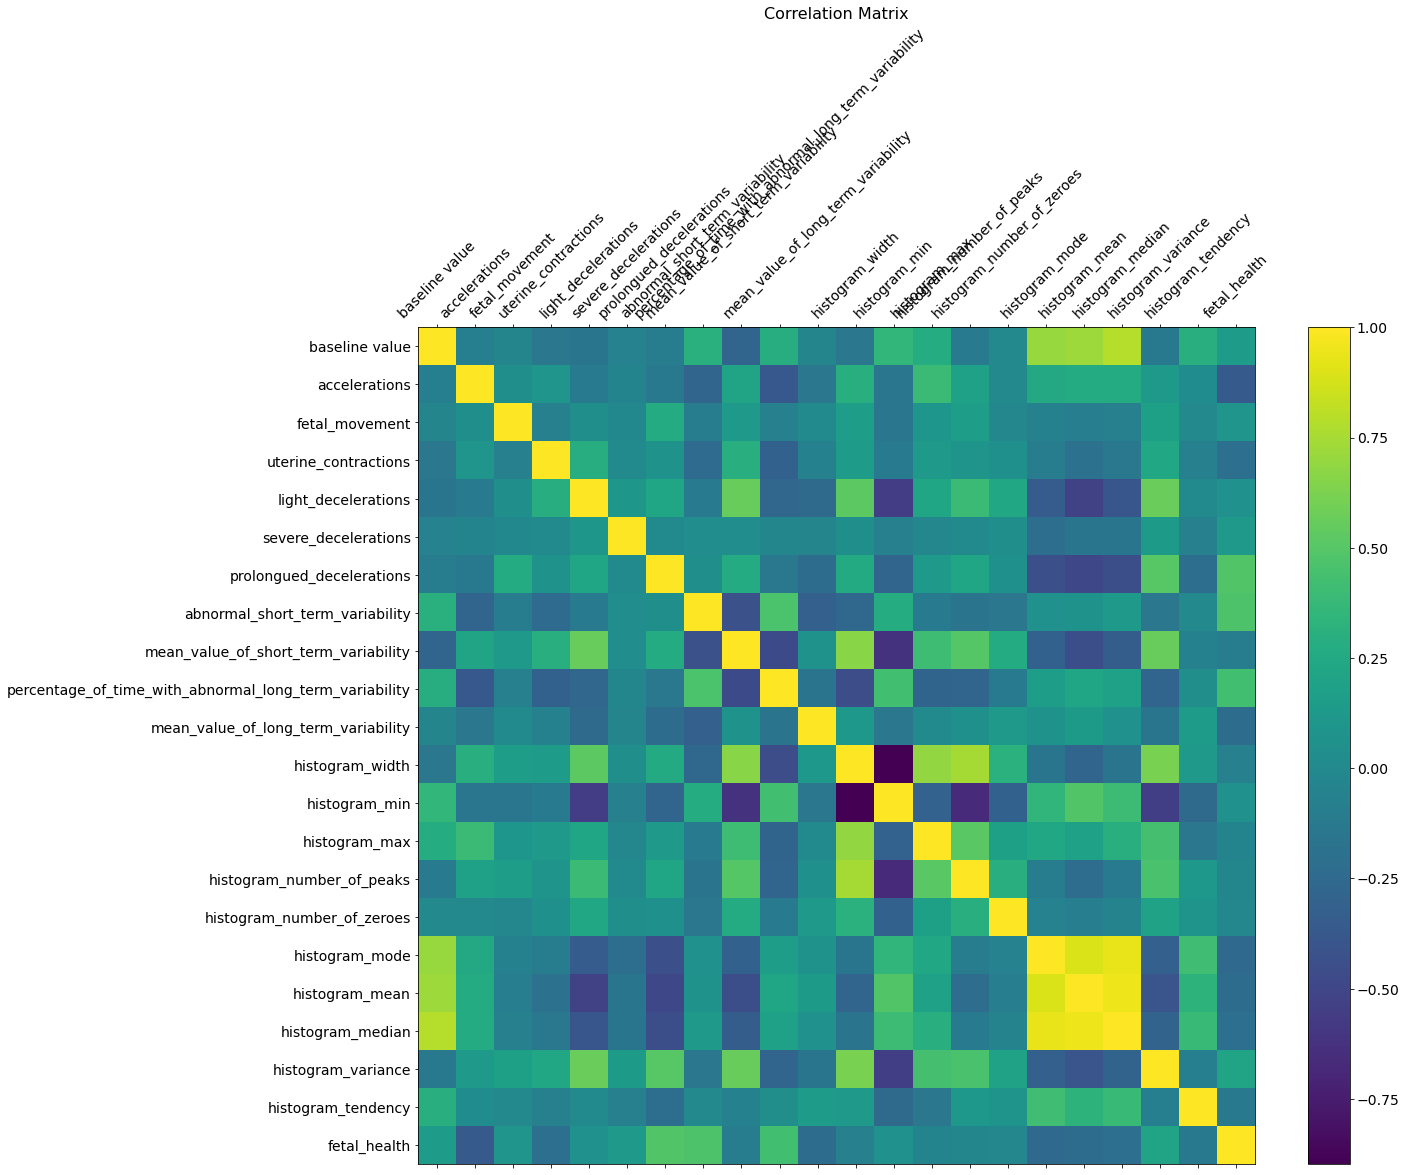

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

<AxesSubplot:>

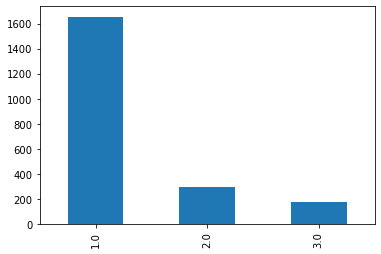

In [8]:
df["fetal_health"].value_counts().plot(kind='bar')

Aparentemente el dataset esta desbalanceado. Tenemos mas ejemplos de fetos normales. Que las otras dos clases. 

Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

In [9]:
def draw_kde(df):
    k = len(df.columns)
    n = 2
    m = (k - 1) // n + 1
    fig, axes = plt.subplots(m, n, figsize=(n * 8, m * 4))
    for i, (name, col) in enumerate(df.iteritems()):
        r, c = i // n, i % n
        ax = axes[r, c]
        col.hist(ax=ax)
        col.plot.kde(ax=ax, secondary_y=True, title=name)
    plt.show()

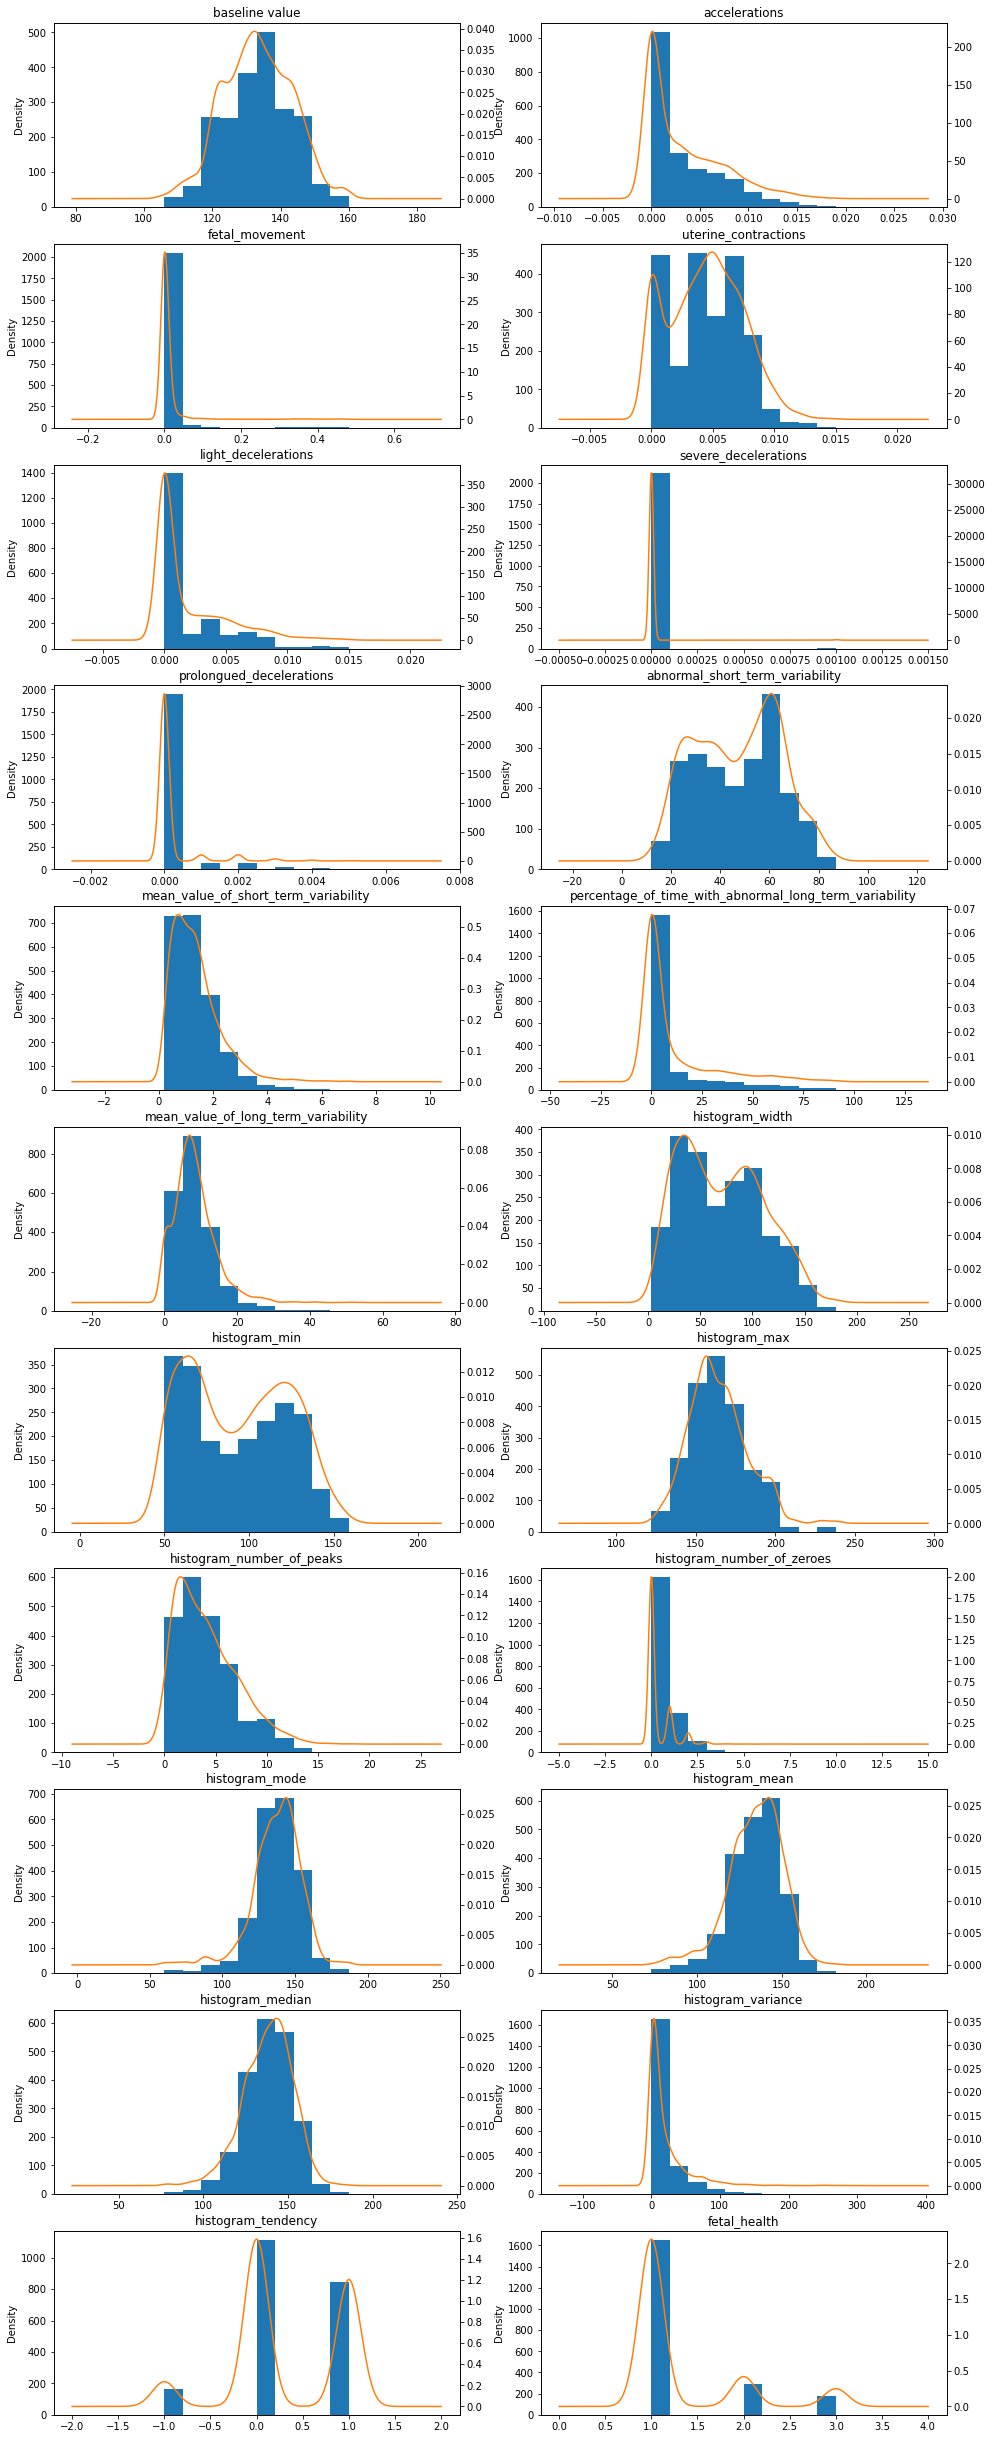

In [10]:
draw_kde(df)

#### Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'fetal_health'], df['fetal_health'], test_size = 0.3, random_state = 5)

In [12]:
X_train.shape

(1488, 21)

In [ ]:
X_test.shape

#### Data Normalization

In [ ]:
scaler = StandardScaler()

In [ ]:
X_test = scaler.fit_transform(X_test)
X_test

In [16]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.13181137,  2.58288705, -0.20584599, ...,  0.47913161,
         1.93099393,  1.15040612],
       [-0.03029205, -0.82502285, -0.18572123, ..., -0.21894715,
        -0.52543822, -0.50671325],
       [ 0.17274657, -0.56287594, -0.16559647, ...,  0.19990011,
        -0.55908797,  1.15040612],
       ...,
       [ 0.68034314, -0.82502285, -0.20584599, ...,  0.96778673,
        -0.55908797, -0.50671325],
       [ 1.0864204 ,  0.48571173, -0.20584599, ...,  1.10740248,
        -0.45813871, -0.50671325],
       [ 0.07122726,  0.22356481, -0.18572123, ..., -0.00952352,
         0.08025738,  1.15040612]])

In [17]:
X_train.shape

(1488, 21)

In [18]:
#### Trainning Callbacks
def _get_checkpoint_cb(path, experiment_id, eval_metric):
    return tf.keras.callbacks.ModelCheckpoint(filepath=f"{path}/experiment_{experiment_id}/checkpoint_{experiment_id}", 
                                                               save_weights_only = True,
                                                               monitor = f'val_{eval_metric}',
                                                               save_best_only = True,
                                                               verbose = 1)

def _get_early_stopping_cb(path, experiment_id, eval_metric):
    return tf.keras.callbacks.EarlyStopping(monitor = f'val_{eval_metric}', patience = 25, restore_best_weights = True)

def _get_tensorboard_cb(path, experiment_id, eval_metric):
    return tf.keras.callbacks.TensorBoard(log_dir=f"{path}/logs/tensorboard", 
                                          histogram_freq=10, 
                                          write_graph=True, 
                                          write_images=False, 
                                          write_steps_per_second=False, 
                                          update_freq="epoch", 
                                          profile_batch=2, 
                                          embeddings_freq=10, 
                                          embeddings_metadata=None)

In [19]:
from os.path import exists

class MLPExperiments():
    def __init__(self, results_path, eval_metric, batch_size, epochs=100, val_split=0.2, training_callbacks = None):
        self.path = results_path
        self.current_model = None
        self.current_history = None
        self.time_to_train = None
        self.eval_metric = eval_metric
        self.epochs = epochs
        self.batch_size = batch_size
        self.val_split = val_split
        self._callbacks = []
        file_exists = exists(f'{self.path}/logs/models.npy')
        if not file_exists:
            self._current_experiment_id = 0
            self.update_experiment_id()
        else:
            self._current_experiment_id = np.load(f'{self.path}/logs/models.npy')[0]
        print(f"Current Experiment Id = : {self._current_experiment_id}")
                                                    
    
    def add_callback(self, build_cb):
        cb = build_cb(self.path, self._current_experiment_id, self.eval_metric)
        self._callbacks.append(cb)
        return self

    def run_experiment(self, model, train_x, train_y):
        self.current_model = model
        self.current_history = model.fit(
                                        x = train_x,
                                        y = train_y,
                                        epochs = self.epochs,
                                        batch_size = self.batch_size,
                                        validation_split = self.val_split,
                                        callbacks = self._callbacks)
        self._current_experiment_id += 1
        self.save_experiment()
        return self.current_model, self._current_experiment_id
    
    def update_experiment_id(self):
        np.save(f'{self.path}/logs/models.npy', [self._current_experiment_id])
        
    def save_experiment(self):
        experiment_id = self.get_current_experiment_id()
        self.update_experiment_id()
        summary = self.current_model.summary()
        history = self.current_history.history
        train_result = history[self.eval_metric][len(history[self.eval_metric]) - 1]
        val_result = history[f"val_{self.eval_metric}"][len(history[f"val_{self.eval_metric}"]) - 1]
        self.current_model.save(f"{self.path}/experiment_{experiment_id}")
        
        print(experiment_id, self.time_to_train, summary, train_result, val_result, sep='\n')
        res = pd.DataFrame({'ExperimentId': experiment_id, 'Datetime': datetime.now().strftime("%Y%m%d-%H:%M:%S"), 
         'TT': self.time_to_train, 'Summary': summary, 
         f"train_{self.eval_metric}": train_result, f"val_{self.eval_metric}": val_result}, index=[0])
        res.to_csv(f'{self.path}/logs/experiments.csv', mode='+a', index = False)
            
    def plot_model_loss(self):
        if not self.current_history:
            return None
        history = self.current_history
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.legend(['Training', 'Validation'])
        plt.title('Train/Val Loss')
        plt.xlabel('Epoch') 
            
    
    def get_model(self, model_id=None):
        return load_model(f"{self.path}/experiment_{model_id}") if model_id else self.current_model
    
    def summary_experiments(self):
        return pd.read_csv(f'{self.path}/logs/experiments.csv').sort_values(by = f"val_{self.eval_metric}")
    
    def get_current_experiment_id(self):
        return self._current_experiment_id
            
    def test(self, x_test, y_true):
        if not self.current_model:
            raise Exception("No model trained")
        test_loss, test_metric = self.current_model.evaluate(x_test, y_true)
#         self.save_results(test)
#         return metrics.classification_report(y_true, y_hat, digits=3)
        return test_loss, test_metric
        

In [20]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform()),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform()),
    Softmax()])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


In [21]:
experiment_controller = MLPExperiments("./fetal_health", "sparse_categorical_accuracy", batch_size = 64).add_callback(_get_checkpoint_cb).add_callback(_get_tensorboard_cb)

Current Experiment Id = : 19


In [22]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train)
print("ExperimentId:", exp_id)


Epoch 1/100
19/19 [==============================] - 1s 24ms/step - loss: 1.8368 - sparse_categorical_accuracy: 0.7471 - val_loss: 0.4005 - val_sparse_categorical_accuracy: 0.8523

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.85235, saving model to ./fetal_health/experiment_19\checkpoint_19
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3507 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.2304 - val_sparse_categorical_accuracy: 0.9060

Epoch 00002: val_sparse_categorical_accuracy improved from 0.85235 to 0.90604, saving model to ./fetal_health/experiment_19\checkpoint_19
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2705 - sparse_categorical_accuracy: 0.8849 - val_loss: 0.2237 - val_sparse_categorical_accuracy: 0.9128

Epoch 00003: val_sparse_categorical_accuracy improved from 0.90604 to 0.91275, saving model to ./fetal_health/experiment_19\checkpoint_19
Epoch 4/100
19/19 [=============================

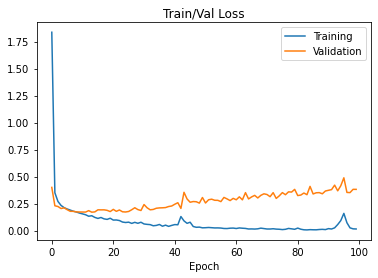

In [23]:
experiment_controller.plot_model_loss()

### Adding Early Stopping

In [24]:
experiment_controller.add_callback(_get_early_stopping_cb)

In [25]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train)
print("ExperimentId:", exp_id)

Epoch 1/100
19/19 [==============================] - 1s 29ms/step - loss: 0.0099 - sparse_categorical_accuracy: 0.9992 - val_loss: 0.3400 - val_sparse_categorical_accuracy: 0.9396

Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0081 - sparse_categorical_accuracy: 0.9983 - val_loss: 0.3512 - val_sparse_categorical_accuracy: 0.9329

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0120 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.3589 - val_sparse_categorical_accuracy: 0.9396

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0114 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3441 - val_sparse_categorical_accuracy: 0.9362

Epoch 00004: val_sparse_categorical_accuracy did not impr

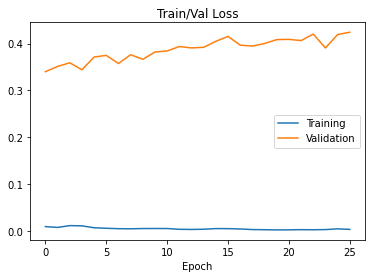

In [26]:
experiment_controller.plot_model_loss()

### Changing Model and Adding Dropout Layers

In [27]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotUniform()),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_initializer = GlorotUniform()),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer = GlorotUniform()),
    Softmax()])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [28]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train)
print("ExperimentId:", exp_id)

Epoch 1/100
19/19 [==============================] - 1s 34ms/step - loss: 2.2582 - sparse_categorical_accuracy: 0.7269 - val_loss: 1.0135 - val_sparse_categorical_accuracy: 0.8322

Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 1.1437 - sparse_categorical_accuracy: 0.8168 - val_loss: 0.8786 - val_sparse_categorical_accuracy: 0.8658

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0121 - sparse_categorical_accuracy: 0.8378 - val_loss: 0.8548 - val_sparse_categorical_accuracy: 0.8624

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.9819 - sparse_categorical_accuracy: 0.8395 - val_loss: 0.8274 - val_sparse_categorical_accuracy: 0.8624

Epoch 00004: val_sparse_categorical_accuracy did not impr

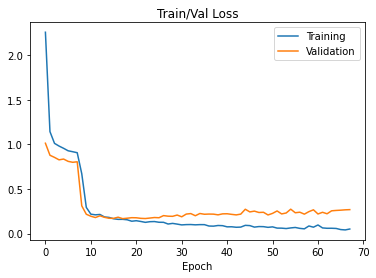

In [29]:
experiment_controller.plot_model_loss()

**Se puede observar una mejora en el modelo con el dropout. Se reduce la diferencia entre al reduccion de la funcion de costo en el data set de entrenamiento y en el data set de validacion**

In [30]:
model = Sequential([
    Dense(1024, input_shape=(21,), activation = 'relu', kernel_initializer = GlorotNormal()),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_initializer = GlorotNormal()),
    Dropout(0.3),
    Dense(128, activation='softmax', kernel_initializer = GlorotNormal())])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [31]:
model, exp_id = experiment_controller.run_experiment(model, X_train, y_train)
print("ExperimentId:", exp_id)

Epoch 1/100
19/19 [==============================] - 1s 45ms/step - loss: 2.1098 - sparse_categorical_accuracy: 0.7042 - val_loss: 0.3897 - val_sparse_categorical_accuracy: 0.8691

Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3993 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.2473 - val_sparse_categorical_accuracy: 0.8993

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3099 - sparse_categorical_accuracy: 0.8739 - val_loss: 0.2195 - val_sparse_categorical_accuracy: 0.9161

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.94966
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2818 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.2062 - val_sparse_categorical_accuracy: 0.9094

Epoch 00004: val_sparse_categorical_accuracy did not impr

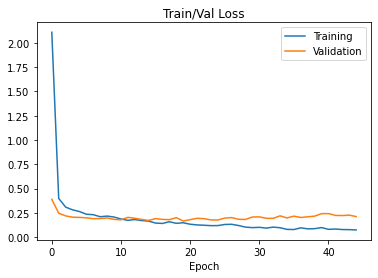

In [32]:
experiment_controller.plot_model_loss()

In [33]:
experiment_controller.test(X_test, y_test)

20/20 [==============================] - 0s 3ms/step - loss: 0.2743 - sparse_categorical_accuracy: 0.9091


(0.2743280231952667, 0.9090909361839294)

In [37]:
%load_ext tensorboard
%tensorboard --logdir=fetal_health/logs/tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
